# Demo Lineare Regression

## Bibliotheken

### Bei Bedarf zuvor installieren

In [1]:
#pip install numpy

In [2]:
#pip install matplotlib

In [3]:
#pip install widgetsnbextension

In [4]:
#pip install ipywidgets

Danach Jupyter Notebook neu starten

### importieren

In [5]:
import numpy as np
import matplotlib.pyplot as pl
import ipywidgets as iw

## Daten

### definieren

In [6]:
X = np.array ([2, 3, 5, 7, 11])
Y = np.array ([0, 3, 6, 9, 12])

### und zeichnen

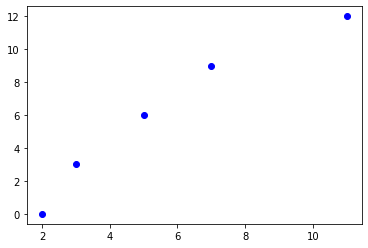

In [7]:
def ZeichneDaten (x, y):
    pl.plot (x, y, 'o', color = 'blue')

ZeichneDaten (X, Y)

## Regressionsgerade (1)

### Werte berechnen

In [8]:
def Gerade (beta0, beta1, x):
    return beta0 + beta1 * x

### und zeichnen

In [9]:
def ZeichneGerade (beta0, beta1, x):
    yhat = Gerade (beta0, beta1, x)
    pl.plot (x, yhat, color = 'magenta')

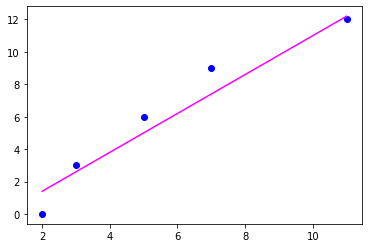

In [10]:
def ZeichneRegression1a (beta0, beta1, x, y):
    ZeichneDaten (x, y)
    ZeichneGerade (beta0, beta1, x)
    
ZeichneRegression1a (-1, 1.2, X, Y)

### Abweichungen berechnen

In [11]:
def Fehlerquadratsumme (beta0, beta1, x, y):
    fehler = y - Gerade (beta0, beta1, x)
    fehlerquadrate = fehler ** 2
    return np.sum (fehlerquadrate)

beta0: -1 / beta1: 1.2 / Fehlerquadratsumme: 5.719999999999999


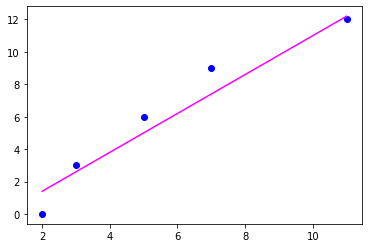

In [12]:
def ZeichneRegression1b (beta0, beta1, x, y):
    print ("beta0:", beta0, \
        "/ beta1:", beta1, \
        "/ Fehlerquadratsumme:", Fehlerquadratsumme (beta0, beta1, x, y))
    ZeichneRegression1a (beta0, beta1, x, y)

ZeichneRegression1b (-1, 1.2, X, Y)

## Interaktive Graphik (1)

In [13]:
def Interaktiv1 (x, y):
    def Callback (beta0, beta1):
        ZeichneRegression1b (beta0, beta1, x, y)
    Sld0 = iw.FloatSlider (min = -5, max = 5, step = 0.01, value = 0, description = 'beta0')
    Sld1 = iw.FloatSlider (min = -5, max = 5, step = 0.01, value = 1, description = 'beta1')
    UserInterface = iw.VBox ([Sld0, Sld1])
    Output = iw.interactive_output (Callback, {'beta0': Sld0, 'beta1': Sld1})
    display (UserInterface, Output)

Interaktiv1 (X, Y)

Output()

## Fehlerquadratsumme minimieren

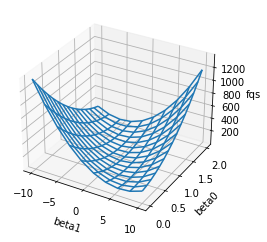

In [14]:
def Zeichne3D (x, y):
    m = 15; beta0 = np.linspace (0, 2, m)
    n = 10; beta1 = np.linspace (-10, 10, n)
    u, v = np.meshgrid (beta1, beta0)
    w = np.zeros ((m, n))
    for i in range (m):
        for k in range (n):
            w [i, k] = Fehlerquadratsumme (u [i, k], v [i, k], x, y)
    fig = pl.figure()
    ax = fig.add_subplot (projection = '3d')
    #ax.view_init (elev = 0, azim = 90)
    ax.set_xlabel ('beta1')
    ax.set_ylabel ('beta0')
    ax.set_zlabel ('fqs')
    ax.plot_wireframe (u, v, w)
    
Zeichne3D (X, Y)

## Regressionsgerade (2)

### Regressionsgerade berechnen

In [15]:
def RegressionsGerade (x, y):
    xquer = np.mean (x); xdiff = x - xquer
    yquer = np.mean (y); ydiff = y - yquer
    beta1 = np.sum (xdiff * ydiff) / np.sum (xdiff ** 2)
    beta0 = yquer - beta1 * xquer
    return beta0, beta1

### und zeichnen

beta0: -1.2187499999999991 / beta1: 1.2890625 / Fehlerquadratsumme: 4.921874999999998


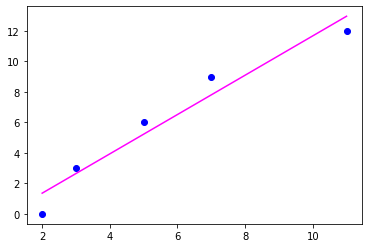

In [16]:
def ZeichneRegression2 (x, y):
    beta0, beta1 = RegressionsGerade (x, y)
    ZeichneRegression1b (beta0, beta1, x, y)
    
ZeichneRegression2 (X, Y)

## Interaktive Graphik (2)

In [17]:
def Interaktiv2 (x, y):
    def Callback (beta0, beta1, exakt):
        if exakt:
            beta0, beta1 = RegressionsGerade (x, y)
        ZeichneRegression1b (beta0, beta1, x, y)
        
    Sld0 = iw.FloatSlider (min = -5, max = 5, step = 0.01, value = 0, description = 'beta0')
    Sld1 = iw.FloatSlider (min = -5, max = 5, step = 0.01, value = 1, description = 'beta1')
    Chbx = iw.Checkbox (value = False, description = 'exakt')
    UserInterface = iw.VBox ([Sld0, Sld1, Chbx])
    Output = iw.interactive_output (Callback, {'beta0': Sld0, 'beta1': Sld1, 'exakt': Chbx})
    display (UserInterface, Output)

Interaktiv2 (X, Y)

Output()